# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [242]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [243]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [244]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [245]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


## Functions

In [246]:
# Bootstrap Replicates	
def bootstrap_replicate_1d(data, func, other_size=len(data)):
    return func(np.random.choice(data, size=other_size))


## Analyze

In [247]:
#Calcs

white = data[data['race'] == 'w']
black = data[data['race'] == 'b']

total_count =len(data)
w_count = len(white)
b_count = len(black)
print('    Total count: ' + str(total_count))
print('    White count: ' + str(w_count))
print('    Black count: ' + str(b_count))
print()

total_calls = np.sum(data['call'])
w_calls = np.sum(white['call'])
b_calls = np.sum(black['call'])
print('    Total calls: ' + str(total_calls))
print('    White calls received: ' + str(w_calls))
print('    Black calls received: ' + str(b_calls))
print()

# Array to be used for Bootstrapping.
calls_true_false_array = np.array( [True] * int(total_calls) + [False] * int(total_count - total_calls))


total_prob = total_calls / total_count
w_prob = w_calls_rcvd / w_count
b_prob = b_calls_rcvd / b_count
print('    Total probability: ' + str(total_prob))
print('    White probability: ' + str(w_prob))
print('    Black probability: ' + str(b_prob))
print()
print()

print('Observations:')
print()
print('    Random?')
print('        The race field was updated at random.')
print()

print('    Each observation is independent of the others?')
print('        Each record represents a different resume so the results are independent.')
print()

print('    Count of observations is > 30?')
print('        Count: ' + str(total_count))
print()

print('    Sample sizes equal?')
print('        White-sounding vs. Black-sounding counts are equal.')
print('            w: ' + str(w_count))
print('            b: ' + str(b_count))
print()




    Total count: 4870
    White count: 2435
    Black count: 2435

    Total calls: 392.0
    White calls received: 235.0
    Black calls received: 157.0

    Total probability: 0.08049281314168377
    White probability: 0.09650924024640657
    Black probability: 0.06447638603696099


Observations:

    Random?
        The race field was updated at random.

    Each observation is independent of the others?
        Each record represents a different resume so the results are independent.

    Count of observations is > 30?
        Count: 4870

    Sample sizes equal?
        White-sounding vs. Black-sounding counts are equal.
            w: 2435
            b: 2435



<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
    <p>Q1: What test is appropriate for this problem? Does CLT apply?</p>
    <p>Z-Test for proportions.</p>
    <p>Does the CLT apply?  Yes.  </p>
    <p>Q2: What are the null and alternate hypotheses?</p>
    <p>Null Hypothesis: Race (black-sounding names vs. white-sounding names) does not have an impact on whether an applicant receives a call from employers.</p>
    <p>Alternative Hypothesis: Race does have an impact on whether an applicant receives a call from employers.</p>
</div>

In [248]:
w = data[data.race=='w']
b = data[data.race=='b']

## Q3
### Bootstrap Result: The Null Hypothesis should be rejected.  The p-value was below .05.

Actual Observed Difference: 0.032032854209445585
Margin of Error: 0.015195071868583163
95% Confidence Interval: [-0.01519507  0.01519507]
P-value: 0.0001



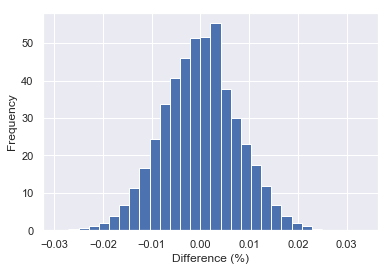

In [249]:
# Your solution to Q3 here

# Bootstrap Hypothesis Test
bs_rep_diff_prob = np.empty(10000)

# Go through 10000 samples
for i in range(10000):
    w_bs_replicates = bootstrap_replicate_1d(data['call'], np.sum, int(w_count))
    b_bs_replicates = bootstrap_replicate_1d(data['call'], np.sum, int(b_count))

    # Calculate the difference for white vs. black in our replications
    bs_rep_diff_prob[i] = (w_bs_replicates - b_bs_replicates) / b_count

    
p_value_diff = np.sum(bs_rep_diff_prob >= (w_prob - b_prob)) / len(bs_rep_diff_prob)
conf_int_diff = np.percentile(bs_rep_diff_prob, [2.5, 97.5])
moe = (conf_int_diff[1] - conf_int_diff[0]) / 2
print('Actual Observed Difference: ' + str(w_prob - b_prob))

print('Margin of Error: ' + str(moe))
print('95% Confidence Interval: ' + str(conf_int_diff))
print('P-value: ' + str(p_value_diff))
print()


_ = plt.hist(bs_rep_diff_prob, bins=30, density=True)
_ = plt.xlabel('Difference (%)')
_ = plt.ylabel('Frequency')
plt.show()



## Q3
### Frequentist Result: The Null Hypothesis should be rejected.  The p-value was below .05.

In [250]:

z_crit = 1.96 # Critical value with 95% confidence interval.
w_p_hat = (w_prob * (1 - w_prob)) / w_count
b_p_hat = (b_prob * (1 - b_prob)) / b_count

# ci lower/upper = [diff probabilities] +- ([z critical value] * sqrt((prob1 * (1-prob1)) / count1) + (prob2 * (1-prob2)) / count2)
# To simplify: phat1 = (prob1 * (1-prob1)) / count1
#              phat2 = (prob2 * (1-prob2)) / count2
#              ci lower/upper = [diff probabilities] +- ([z critical value] * sqrt(phat1 + phat2)

w_p_hat = (w_prob * (1 - w_prob)) / w_count
b_p_hat = (b_prob * (1 - b_prob)) / b_count

conf_int_upper = (w_prob - b_prob) + (z_crit * (np.sqrt(w_p_hat + b_p_hat)))
conf_int_lower = (w_prob - b_prob) - (z_crit * (np.sqrt(w_p_hat + b_p_hat)))

# Margin of Error = (upper - lower) / 2
moe = (conf_int_upper - conf_int_lower) / 2

print('Actual Observed Difference: ' + str(w_prob - b_prob))

print('Margin of Error: +-' + str(moe))
print('Confidence Interval: ' + str(conf_int_lower) + ' to ' + str(conf_int_upper))

# Standard Error = sqrt ( (p1 * (1-p1)) / n1 + (p2 * (1-p2))/n2))
se = np.sqrt((total_prob * (1-total_prob)) * (1/w_count + 1/b_count))
print('Standard Error: ' + str(se))
z_stat = (w_prob - b_prob) / se
print('z: ' + str(z_stat))

p_value = 2 * (1 - stats.norm.cdf(z_stat)) # 2-sided
print('P-value: ' + str(p_value))






Actual Observed Difference: 0.032032854209445585
Margin of Error: +-0.015255406349886438
Confidence Interval: 0.016777447859559147 to 0.047288260559332024
Standard Error: 0.007796894036170457
z: 4.108412152434346
P-value: 3.983886837577444e-05


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
<p> Q4: Based on the results above, we can say that white sounding names receive a significantly higher number of calls compared to black sounding names.  The probability of a white sounding name getting a call is around 9.65 % whereas the probability of a black sounding name getting a call is around 6.45 %. </p>
<p> Q5: Although race seems to be a big factor in if an applicant gets a call, we cannot say that race is the "most important factor".  We would need to do more analysis on the other variables to determine if race is the "most important factor".
To amend the analysis, we could analyze the other variables in the same detail that we did on race. </p>    
</div>